In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Iterable

In [8]:
def multi_plot(data1, data2, data3, data4, data5, data6, title, labels, n_threads):
    fig, ax = plt.subplots(figsize=[10, 10])

    boxes = []
    colors = []
    group_positions = []

    # 6 colori per 6 dataset
    color_map = ["peachpuff", "orange", "yellow", "blue", "lightgreen", "violet"]

    for i in range(len(n_threads)):
        boxes.extend([data1[i], data2[i], data3[i], data4[i], data5[i], data6[i]])
        colors.extend(color_map)
        # Ogni gruppo di 6 box → centro a 6*i + 3.5
        group_center = 6 * i + 3.5
        group_positions.append(group_center)

    # Boxplot
    bplot = ax.boxplot(boxes, showfliers=False, patch_artist=True)

    # Colori box
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

    # Etichette sugli assi
    ax.set_xticks(group_positions)
    ax.set_xticklabels([str(n) for n in n_threads])

    ax.set_ylabel('Microseconds')
    ax.set_xlabel('n_threads')
    ax.set_title(title, loc='left')
    ax.set_yscale('log')

    # Legenda (solo il primo gruppo di 6 box)
    legend_handles = [bplot["boxes"][i] for i in range(6)]
    ax.legend(legend_handles, labels, loc='upper right')

    # Mediane rosse
    for median in bplot['medians']:
        median.set_color('red')

    # Info run
    plt.figtext(
        0.54, 0.98,
        f"threadpool: size_queue({size_queue})\n"
        f"setup: number total job {n_elems}, n_operation_in_single_job {n_body_function}/ {n_body_function*4}\n"
        f"runs: {n_runs}",
        fontsize=9,
        bbox=dict(facecolor='white', edgecolor='black')
    )

    plt.tight_layout()
    plt.show()

    # ===== Median values =====
    print(f"\n=== Median values for {title} ===")
    medians = [np.median(b) for b in boxes]

    for i, n in enumerate(n_threads):
        print(f"\nThreads = {n}")
        for j, label in enumerate(labels):
            idx = i * 6 + j
            print(f"  {label:>12}: {medians[idx]:.2f}")


In [9]:
# ===================== DATI PER THREAD 1 =====================
dati_Round_Random_thread1 = [57619,57040,57110,57667,57415,57765,57345,57264,57210,56387,56692,57722,57278,57208,57552,57175,57648,57713,57660,57323,57345,57283,57379,57574,57621,56737,57583,56624,57343,56646]
dati_Round_Random_half_thread1 = [55867,56424,56262,56259,56186,56133,56899,55871,56182,55326,56280,56036,55564,55747,56179,57021,55893,56242,56235,56065,57143,55681,56350,56323,56384,56366,56667,55807,55962,56261]
dati_Round_Mostbusy_thread1 = [57087,58588,57461,57107,57659,57746,57667,57823,57668,57050,57246,57406,57653,57726,57545,57621,57892,57531,57422,56913,57800,57292,57821,57827,57349,57658,57585,57056,58264,56625]
dati_Mostfree_Random_thread1 = [57619,57040,57110,57667,57415,57765,57345,57264,57210,56387,56692,57722,57278,57208,57552,57175,57648,57713,57660,57323,57345,57283,57379,57574,57621,56737,57583,56624,57343,56646]
dati_Mostfree_Random_half_thread1 = [57476,57259,57761,57909,57695,57730,57742,57743,57516,57559,57827,57744,57207,57653,57970,57390,57190,57371,57427,57716,56948,57342,56749,57658,57595,57165,57494,57700,57377,57357]
dati_Mostfree_Mostbusy_thread1 = [58080,57295,58147,58007,57582,58219,58477,57776,58264,57814,58678,57784,57320,57633,58779,57279,57773,58296,57830,57435,57794,57954,58249,57922,58389,58827,58181,58137,58117,57759]

# ===================== DATI PER THREAD 2 =====================
dati_Round_Random_thread2 = [26282,26531,26329,26157,26184,26119,26215,26265,26313,26163,26550,26411,27959,28385,28834,28744,28628,28473,28582,26344,26551,26221,26383,26188,26137,28635,28257,28444,28186,28327]
dati_Round_Random_half_thread2 = [26427,26090,25876,25719,26091,25736,25825,25886,26005,25946,25893,27947,27637,27978,28269,28373,27789,27693,28221,26035,25883,25704,26004,25589,25715,27711,27536,28046,28024,28117]
dati_Round_Mostbusy_thread2 = [26905,26470,26264,26858,26420,26954,26488,28980,26639,26508,26595,26327,28470,29147,29037,27986,29234,28670,29117,26736,26697,26575,26533,26992,26625,28263,28288,28735,28735,28570]
dati_Mostfree_Random_thread2 = [26054,26200,26223,26258,26382,26233,25929,25983,26116,25997,26255,26142,28076,28514,28511,28589,28328,28862,28509,26869,26538,26268,26272,26167,26901,26030,27390,28184,28239,28239]
dati_Mostfree_Random_half_thread2 = [26845,26837,26886,26780,26777,26884,26849,26922,26787,26789,26719,26640,28574,29307,29116,29105,29361,29490,28939,27030,26843,26599,26605,26598,26985,26720,28292,28926,28877,28793]
dati_Mostfree_Mostbusy_thread2 = [26896,26789,26837,26663,26680,26715,27122,26705,26610,27052,26812,26720,28904,28372,28822,29287,29618,28789,29138,29067,26616,27173,26811,26631,26658,26999,28723,29092,28903,29106]

# ===================== DATI PER THREAD 4 =====================
dati_Round_Random_thread4 = [12941,12830,12806,12858,12851,13402,12918,12797,12896,12920,12831,12886,12830,12912,12858,12892,12913,12887,12847,12896,12825,13526,12883,12958,12867,12834,13072,12860,12880,12905]
dati_Round_Random_half_thread4 = [12829,12735,12699,12722,12945,12820,12820,12768,12794,12657,12779,12360,12697,12682,12736,12711,12696,12724,12706,12745,12663,12906,12776,13013,12677,12762,12785,12841,12798,12763]
dati_Round_Mostbusy_thread4 = [13103,13039,12990,13031,13609,13079,13058,13094,13116,13052,13046,13002,13086,13121,12967,13064,12713,13073,13031,12465,12967,12978,13064,12998,13014,13336,13079,13086,13107,13080]
dati_Mostfree_Random_thread4 = [12953,12839,12839,12822,12815,12847,12860,12792,12916,12912,13293,12903,12826,12814,12856,12822,12739,12842,13252,12595,12789,12758,12828,12825,12792,12768,12839,12812,12872,12847]
dati_Mostfree_Random_half_thread4 = [13253,13099,13096,13061,13073,13126,13087,13033,13257,13124,13169,13176,13153,13076,13087,13113,13135,13026,13151,13038,13038,13015,13026,13050,13086,13152,13145,13839,13145,13094]
dati_Mostfree_Mostbusy_thread4 = [13464,13148,13092,13019,13393,13085,13147,13181,13183,13186,13110,13120,13132,13126,13087,12999,13857,13108,13198,13411,12892,13124,12988,13100,13170,13093,13086,13020,13224,13202]

# ===================== DATI PER THREAD 8 =====================
dati_Round_Random_thread8 = [11207,13606,11455,11945,11320,11194,12092,11145,13570,13256,12474,10712,11101,10126,11326,12620,12683,12112,13524,12534,12208,11042,11373,11595,17488,23737,17734,19332,18457,16715]
dati_Round_Random_half_thread8 = [10896,10631,10556,10806,11051,11519,10470,11660,12279,9681,9474,12995,10457,11602,11402,12018,10846,11926,10484,10422,10802,10497,12656,12953,16047,15397,14693,15042,14838,18772]
dati_Round_Mostbusy_thread8 = [12237,10333,11301,13009,12993,10960,12312,11109,13013,11155,10845,11946,10852,11156,12282,10701,11456,10685,9956,10860,12379,11983,11921,10439,12598,15938,14630,14235,13832,16626]
dati_Mostfree_Random_thread8 = [11364,12737,11373,11555,12853,13498,11385,13917,13620,13271,12369,11292,13619,11605,11305,11267,13178,11597,11346,11442,11777,10777,11129,13816,11950,16361,19304,17916,17786,16915]
dati_Mostfree_Random_half_thread8 = [10171,12766,10957,10868,11751,11892,10598,10730,12713,11188,11838,12981,11508,10687,11474,10013,10763,11302,10224,10835,12472,11438,11155,12875,19161,17651,15469,17192,14021,15196]
dati_Mostfree_Mostbusy_thread8 = [10982,12103,9762,11550,10642,11374,10805,11172,10072,10653,11219,10227,11357,10675,12841,10922,12802,10102,10058,11113,12488,11742,10499,11380,9907,17348,14200,16270,14415,14848]


# ===================== DATI PER THREAD 16 =====================
dati_Round_Random_thread16 = [11207,13606,11455,11945,11320,11194,12092,11145,13570,13256,12474,10712,11101,10126,11326,12620,12683,12112,13524,12534,12208,11042,11373,11595,17488,23737,17734,19332,18457,16715]
dati_Round_Random_half_thread16 = [10896,10631,10556,10806,11051,11519,10470,11660,12279,9681,9474,12995,10457,11602,11402,12018,10846,11926,10484,10422,10802,10497,12656,12953,16047,15397,14693,15042,14838,18772]
dati_Round_Mostbusy_thread16 = [12237,10333,11301,13009,12993,10960,12312,11109,13013,11155,10845,11946,10852,11156,12282,10701,11456,10685,9956,10860,12379,11983,11921,10439,12598,15938,14630,14235,13832,16626]
dati_Mostfree_Random_thread16 = [11364,12737,11373,11555,12853,13498,11385,13917,13620,13271,12369,11292,13619,11605,11305,11267,13178,11597,11346,11442,11777,10777,11129,13816,11950,16361,19304,17916,17786,16915]
dati_Mostfree_Random_half_thread16 = [10171,12766,10957,10868,11751,11892,10598,10730,12713,11188,11838,12981,11508,10687,11474,10013,10763,11302,10224,10835,12472,11438,11155,12875,19161,17651,15469,17192,14021,15196]
dati_Mostfree_Mostbusy_thread16 = [10982,12103,9762,11550,10642,11374,10805,11172,10072,10653,11219,10227,11357,10675,12841,10922,12802,10102,10058,11113,12488,11742,10499,11380,9907,17348,14200,16270,14415,14848]

# ===================== DATI PER THREAD 32 =====================
dati_Round_Random_thread32 = [14576,12865,15355,15323,15432,15196,15323,15465,15573,12910,15476,15448,14400,15275,15304,17896,15831,12505,12406,16092,12693,15542,15303,15389,15663,15630,15720,14499,15310,14188]
dati_Round_Random_half_thread32 = [14957,15561,13624,15018,12789,15795,14797,14617,15132,14033,15555,16013,14152,15030,15543,11496,15033,15581,15102,16254,15459,15418,15228,12671,12549,15266,13557,14981,15329,14912]
dati_Round_Mostbusy_thread32 = [13489,14198,13842,13903,14763,13952,12773,13595,14352,13744,13747,13888,13962,15301,12655,14111,14681,13269,14044,13779,14240,13214,14521,13729,13135,14378,13132,14091,14074,13427]
dati_Mostfree_Random_thread32 = [16083,15994,15630,15597,12562,12491,15210,15553,12831,15516,15663,15607,15696,15385,15899,15544,14821,13662,15318,15605,15507,15918,12578,16065,15889,13254,15589,13291,14817,16046]
dati_Mostfree_Random_half_thread32 = [14422,14978,11904,15299,15241,15018,16575,15076,15008,15379,15300,15696,15807,15538,15591,15522,14379,15270,15147,15426,16099,15270,15476,15602,15535,15503,14987,15274,12964,14140]
dati_Mostfree_Mostbusy_thread32 = [12981,14141,14006,15577,14896,14866,14962,15262,14299,14776,15752,12853,14871,14940,14688,14829,14545,14764,15106,14456,14949,11885,15073,15376,13679,12833,12515,15367,12506,14774]

# ===================== DATI PER THREAD 64 =====================
dati_Round_Random_thread64 = [18460,20860,20077,17417,19713,20400,22394,19468,15721,19860,20465,16796,17508,15740,16687,16781,20166,19379,20476,15511,18323,19547,19474,17757,15803,16541,20741,18994,21264,21337]
dati_Round_Random_half_thread64 = [19437,14559,18464,18753,20615,17100,20873,21639,17839,19460,20228,18296,17442,15947,17395,17436,16135,15193,19404,16482,15509,19279,19446,19981,15391,15404,18456,20839,21037,15249]
dati_Round_Mostbusy_thread64 = [17447,15942,16026,19921,18602,20932,17900,20850,17801,18806,17944,18720,18815,18372,20629,13948,19589,16250,18765,17792,18426,18465,16956,18397,19197,20262,16233,18837,18032,19314]
dati_Mostfree_Random_thread64 = [21328,20260,19242,19981,21079,18139,14867,20206,20361,15872,20383,20234,21937,20949,20895,19668,17260,17010,16063,15710,19843,16905,20302,14675,16070,23333,21945,20516,16637,20824]
dati_Mostfree_Random_half_thread64 = [21002,20469,19952,19897,16508,20441,18038,25845,19744,22695,22373,19990,20080,18804,17569,16511,15381,18683,20647,15044,18328,20899,15906,18334,20253,21653,20644,18566,14346]
dati_Mostfree_Mostbusy_thread64 = [17596,16083,19814,19357,19721,18989,19200,14343,16449,14603,22206,17644,19206,19123,13985,20666,18843,19259,15609,18244,16560,18354,18843,16627,17147,18567,20409,21129,19738,18115]

# ===================== CONCATENAZIONE =====================
dati_Round_Random_multi = [
    dati_Round_Random_thread1,
    dati_Round_Random_thread2,
    dati_Round_Random_thread4,
    dati_Round_Random_thread8,
    dati_Round_Random_thread16,
    dati_Round_Random_thread32,
    dati_Round_Random_thread64
]

dati_Round_Random_half_multi = [
    dati_Round_Random_half_thread1,
    dati_Round_Random_half_thread2,
    dati_Round_Random_half_thread4,
    dati_Round_Random_half_thread8,
    dati_Round_Random_half_thread16,
    dati_Round_Random_half_thread32,
    dati_Round_Random_half_thread64
]

dati_Round_Mostbusy_multi = [
    dati_Round_Mostbusy_thread1,
    dati_Round_Mostbusy_thread2,
    dati_Round_Mostbusy_thread4,
    dati_Round_Mostbusy_thread8,
    dati_Round_Mostbusy_thread16,
    dati_Round_Mostbusy_thread32,
    dati_Round_Mostbusy_thread64
]

dati_Mostfree_Random_multi = [
    dati_Mostfree_Random_thread1,
    dati_Mostfree_Random_thread2,
    dati_Mostfree_Random_thread4,
    dati_Mostfree_Random_thread8,
    dati_Mostfree_Random_thread16,
    dati_Mostfree_Random_thread32,
    dati_Mostfree_Random_thread64
]

dati_Mostfree_Random_half_multi = [
    dati_Mostfree_Random_half_thread1,
    dati_Mostfree_Random_half_thread2,
    dati_Mostfree_Random_half_thread4,
    dati_Mostfree_Random_half_thread8,
    dati_Mostfree_Random_half_thread16,
    dati_Mostfree_Random_half_thread32,
    dati_Mostfree_Random_half_thread64
]

dati_Mostfree_Mostbusy_multi = [
    dati_Mostfree_Mostbusy_thread1,
    dati_Mostfree_Mostbusy_thread2,
    dati_Mostfree_Mostbusy_thread4,
    dati_Mostfree_Mostbusy_thread8,
    dati_Mostfree_Mostbusy_thread16,
    dati_Mostfree_Mostbusy_thread32,
    dati_Mostfree_Mostbusy_thread64
]


In [10]:
#parametri
#settare manualmente uguali a quelli usati in cluster
n_runs = 50
n_threads = [1,2,4,8,16,32,64]#,96]  #lista in send_steal_bilanciati.sh !
size_queue = 4096
n_body_function = 5000 
n_elems = 4096 #job totali

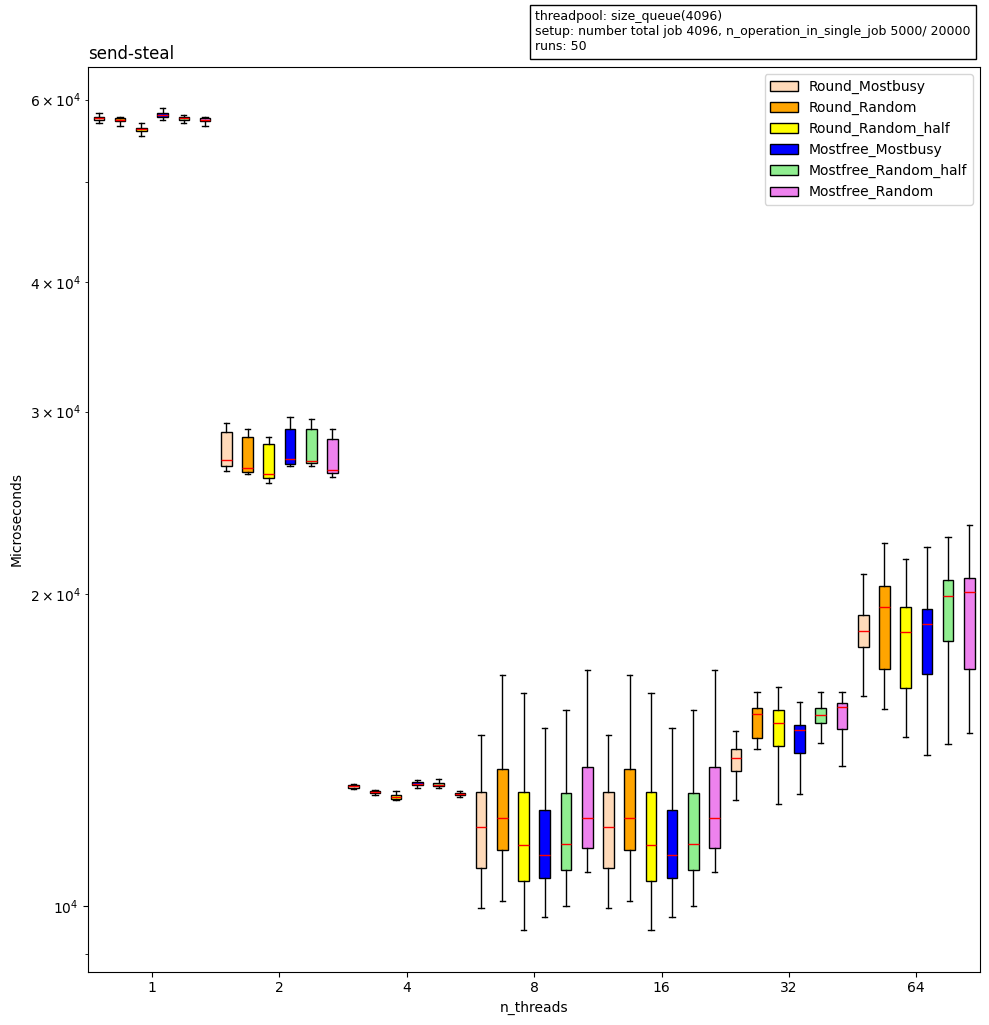


=== Median values for send-steal ===

Threads = 1
  Round_Mostbusy: 57603.00
  Round_Random: 57344.00
  Round_Random_half: 56210.50
  Mostfree_Mostbusy: 57980.50
  Mostfree_Random_half: 57537.50
  Mostfree_Random: 57344.00

Threads = 2
  Round_Mostbusy: 26929.50
  Round_Random: 26471.00
  Round_Random_half: 26090.50
  Mostfree_Mostbusy: 27025.50
  Mostfree_Random_half: 26885.00
  Mostfree_Random: 26327.00

Threads = 4
  Round_Mostbusy: 13061.00
  Round_Random: 12884.50
  Round_Random_half: 12753.50
  Mostfree_Mostbusy: 13125.00
  Mostfree_Random_half: 13097.50
  Mostfree_Random: 12833.50

Threads = 8
  Round_Mostbusy: 11933.50
  Round_Random: 12160.00
  Round_Random_half: 11460.50
  Mostfree_Mostbusy: 11195.50
  Mostfree_Random_half: 11491.00
  Mostfree_Random: 12159.50

Threads = 16
  Round_Mostbusy: 11933.50
  Round_Random: 12160.00
  Round_Random_half: 11460.50
  Mostfree_Mostbusy: 11195.50
  Mostfree_Random_half: 11491.00
  Mostfree_Random: 12159.50

Threads = 32
  Round_Mostbusy:

In [11]:
labels = ["Round_Mostbusy","Round_Random","Round_Random_half","Mostfree_Mostbusy","Mostfree_Random_half","Mostfree_Random"]
multi_plot(
    dati_Round_Mostbusy_multi,
    dati_Round_Random_multi,
    dati_Round_Random_half_multi,
    dati_Mostfree_Mostbusy_multi,
    dati_Mostfree_Random_half_multi,
    dati_Mostfree_Random_multi,
    "send-steal",
    labels,
    n_threads
)
